This is my testing ground, named after the SpaceX testing ground in Texas. I use it to test stuff that I'm not sure about, which usually involves the dimensions of matrices resulting from tf-ops.

In [ ]:
import tensorflow as tf
import numpy as np

n = 5
d = 3

x = tf.constant(np.reshape(np.arange(n),[n,1]), dtype=tf.float32)
coefficients = tf.constant(np.reshape(np.arange(n*d),[n,d]), dtype=tf.float32)
summe = tf.constant(np.zeros((5,1)), dtype=tf.float32)
for i in range(d):
    summe += tf.multiply(tf.math.pow(x,tf.constant(i, dtype=tf.float32)), tf.reshape(coefficients[:,i], [n,1]))

with tf.Session() as sess:
    _x, _co, _sum = sess.run([x,coefficients,summe])
    print(_x)
    print(_co)
    print(_sum)

In [ ]:
import tensorflow as tf

a = tf.constant(np.ones((32)), dtype=tf.float32)
b = tf.constant(np.ones((32))*3, dtype=tf.float32)
res = tf.multiply(a,b)

with tf.Session() as sess:
    _res = sess.run(res)
    print(_res)

In [ ]:
#baseline implementation
import tensorflow as tf
import numpy as np

neurons_out = 8
neurons_in = 8
degree = 4
batchsize = 10

initializer = tf.random_normal_initializer(stddev = neurons_in**(-1/2))
logits = tf.constant(np.reshape(np.ones(batchsize*neurons_out)*2, [batchsize, neurons_out]), dtype=tf.float32)

coefficients = tf.constant(np.ones((neurons_out, degree)), dtype=tf.float32)

# I really don't like this, and it's slow as hell. TODO find a better way of implementing this
sum_list = []
for b in range(batchsize):
    inner_sum = tf.constant(np.zeros((neurons_out)), dtype=tf.float32)
    for i in range(degree):
        inner_sum += tf.multiply(tf.math.pow(logits[b,:],tf.constant(i, dtype=tf.float32)), coefficients[:,i])
    sum_list.append(inner_sum)
res = tf.stack(sum_list)
print("resulting shape: ",res)


In [ ]:
with tf.Session() as sess:
    r, _logits = sess.run([res, logits])
    
    print("logits: ")
    print("shape: ",_logits.shape)
    print(_logits)
    
    print("shape: ",r.shape)
    print(r)
    

In [ ]:
# testing ground

import tensorflow as tf
import numpy as np

neurons_out = 8
neurons_in = 8
degree = 4
batchsize = 10

initializer = tf.random_normal_initializer(stddev = neurons_in**(-1/2))
logits = tf.constant(np.reshape(np.ones(batchsize*neurons_out)*2, [batchsize, neurons_out]), dtype=tf.float32)

coefficients = tf.constant(np.ones((neurons_out, degree)), dtype=tf.float32)
exponents = tf.constant(np.arange(degree), dtype=tf.float32)

sum_list = []
for b in range(batchsize):
    inner_sum = tf.constant(np.zeros((neurons_out)), dtype=tf.float32)
    for i in range(degree):
        inner_sum += tf.multiply(tf.math.pow(logits[b,:],exponents[i]), coefficients[:,i])
    sum_list.append(inner_sum)
res = tf.stack(sum_list)
print("resulting shape: ",res)

In [ ]:
with tf.Session() as sess:
    r, _logits,_e = sess.run([res, logits, exponents])
    
    print("logits: ")
    print("shape: ",_logits.shape)
    print(_logits)
    
    print("shape: ",r.shape)
    print(r)
    
    print(_e)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/Users/thomasklein/Projects/Polyron/results/poly_5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1256d6128>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
(32, 5)


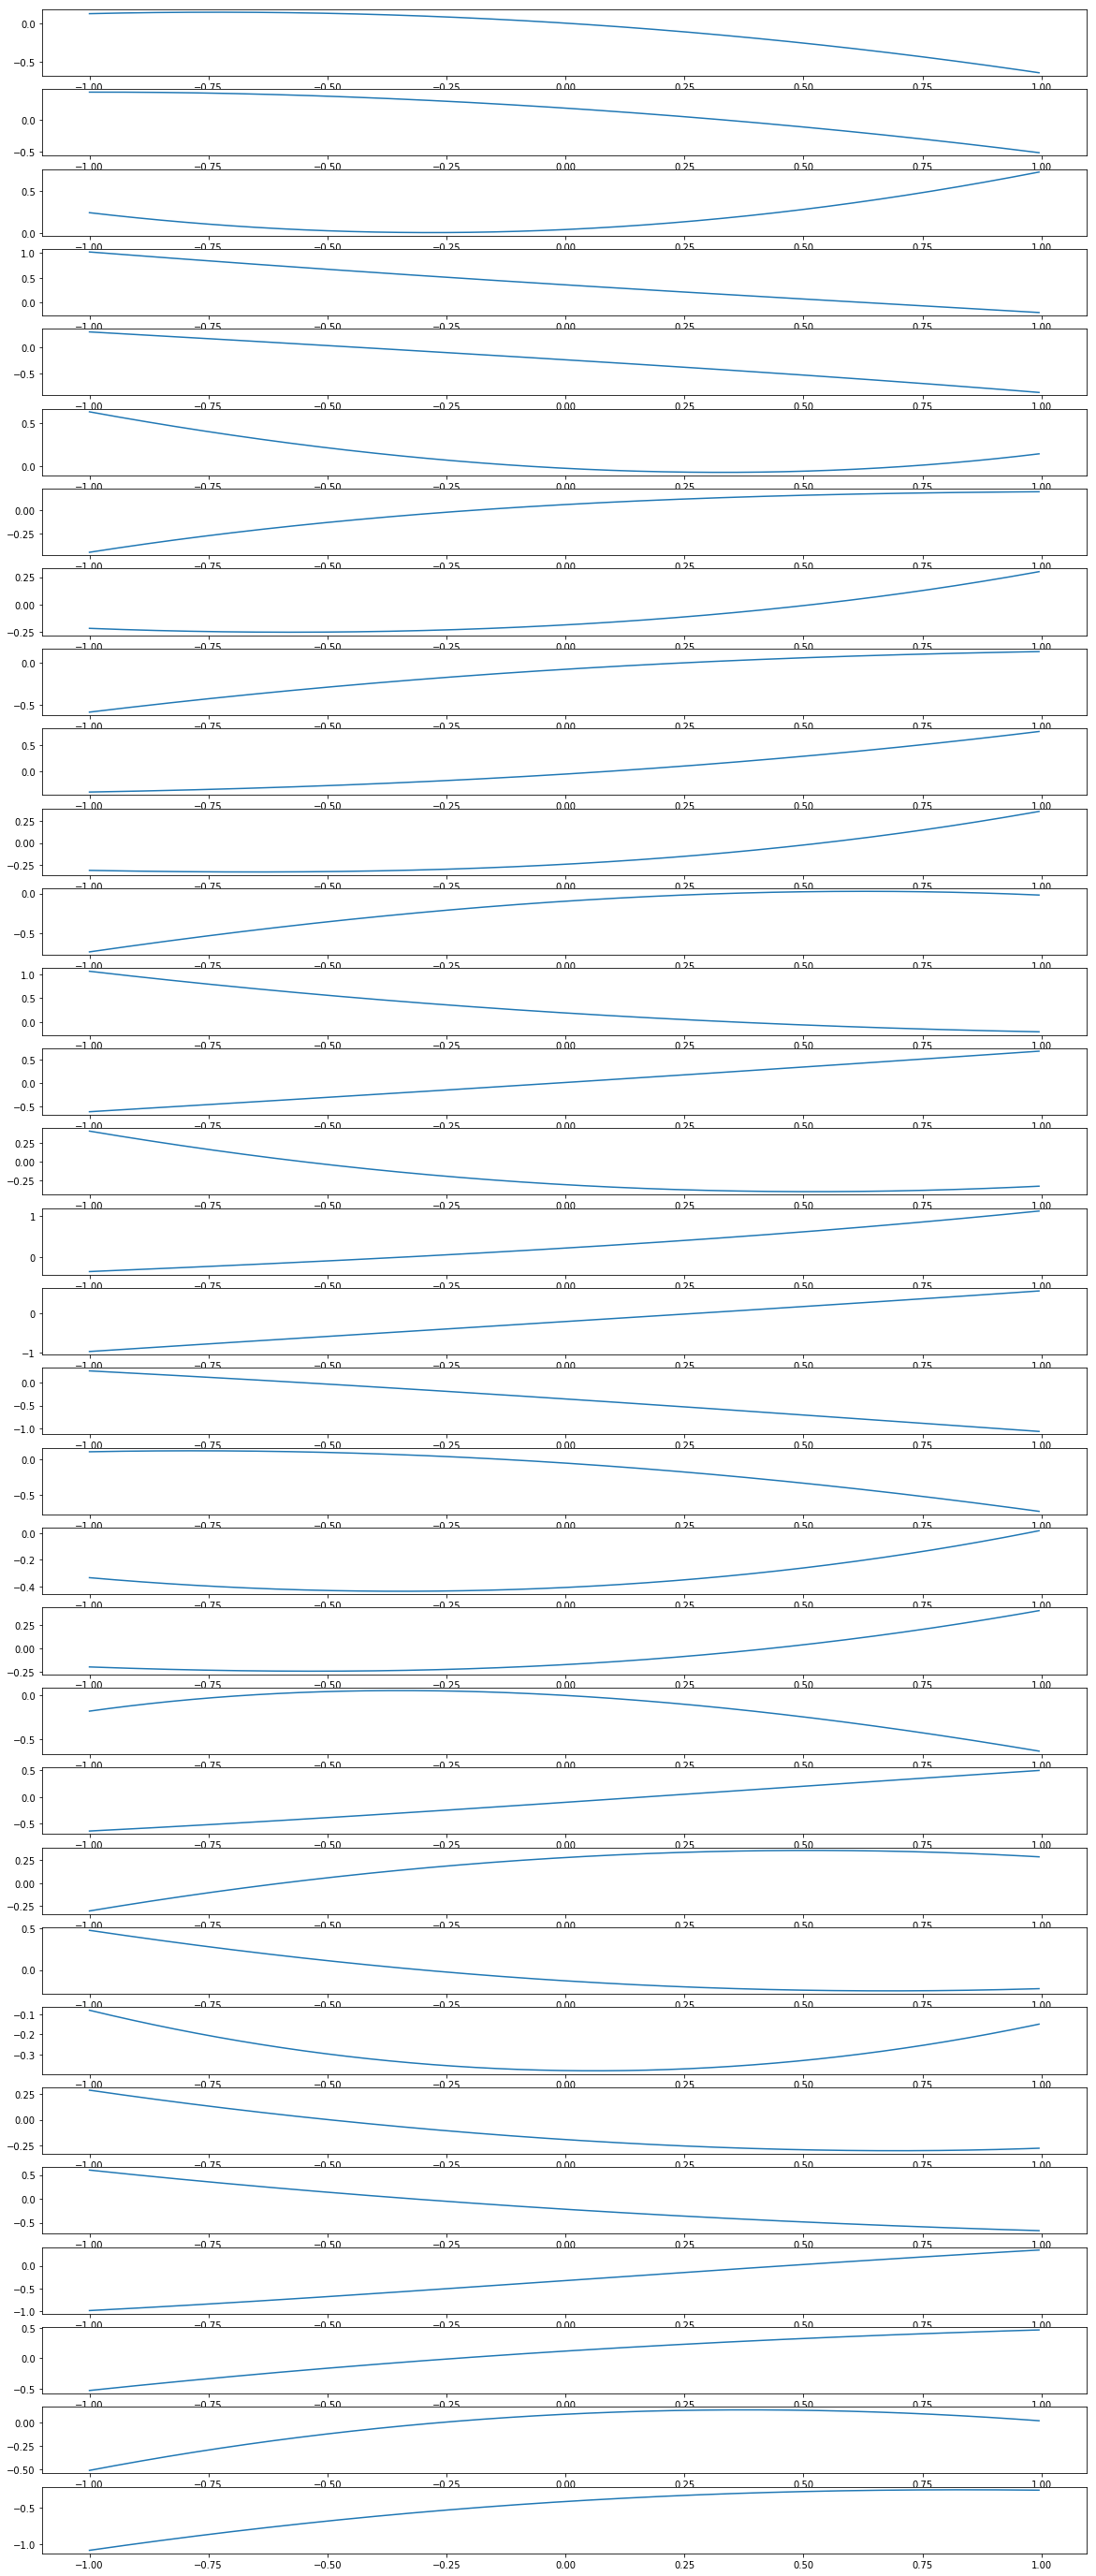

In [5]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from create_estimator import create_estimator

flags = tf.flags # cmd line FLAG manager for tensorflow
logging = tf.logging # logging manager for tensorflow
FLAGS = flags
FLAGS.degree = 5
FLAGS.mode = 'poly'
FLAGS.save_path = "/Users/thomasklein/Projects/Polyron/results/poly_5"

def main():

    classifier = create_estimator(FLAGS)
    
    weights = classifier.get_variable_value('layer0/coefficients')
    print(weights.shape)
    
    plot_polynomials(weights)

def eval_polynomial(x, coeff):
    y = 0
    for i in range(len(coeff)):
            y += coeff[i] * (x ** i)
    return y

def plot_polynomials(coeff):

    neurons, degree = coeff.shape
    xs = np.arange(start=-1, stop=1, step=0.005)

    plt.figure(figsize=(20,50))

    for n in range(neurons): 
        c = coeff[n,:]
        ys = eval_polynomial(xs,c)
        plt.subplot(neurons,1, n+1)#rows, columns
        plt.plot(xs,ys)
    
    plt.show()

    


if __name__ == "__main__":
    main()


In [26]:
import numpy as np
np.random.seed(42)
units = 5
batch = 4
degree = 3

inp = np.random.randint(10,size=(batch, units))
print(inp)

exp = np.stack([inp**i for i in range(degree)])
print(exp)
print(exp.shape)

coeff = np.random.randint(10,size=(units, degree))

print(coeff)

res = np.stack([[exp[j,:,i] * coeff[i,j] for i in range(units)] for j in range(degree)])

print("  ")
print(res)

final = np.sum(res, axis=0)
print(final.T)

[[6 3 7 4 6]
 [9 2 6 7 4]
 [3 7 7 2 5]
 [4 1 7 5 1]]
[[[ 1  1  1  1  1]
  [ 1  1  1  1  1]
  [ 1  1  1  1  1]
  [ 1  1  1  1  1]]

 [[ 6  3  7  4  6]
  [ 9  2  6  7  4]
  [ 3  7  7  2  5]
  [ 4  1  7  5  1]]

 [[36  9 49 16 36]
  [81  4 36 49 16]
  [ 9 49 49  4 25]
  [16  1 49 25  1]]]
(3, 4, 5)
[[4 0 9]
 [5 8 0]
 [9 2 6]
 [3 8 2]
 [4 2 6]]
  
[[[  4   4   4   4]
  [  5   5   5   5]
  [  9   9   9   9]
  [  3   3   3   3]
  [  4   4   4   4]]

 [[  0   0   0   0]
  [ 24  16  56   8]
  [ 14  12  14  14]
  [ 32  56  16  40]
  [ 12   8  10   2]]

 [[324 729  81 144]
  [  0   0   0   0]
  [294 216 294 294]
  [ 32  98   8  50]
  [216  96 150   6]]]
[[328  29 317  67 232]
 [733  21 237 157 108]
 [ 85  61 317  27 164]
 [148  13 317  93  12]]
